In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import matplotlib.pyplot as plt

#for model-building
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.manifold import TSNE

In [2]:
df_dados= pd.read_csv('../../dados classificacao texto/disaster/train.csv')

df_dados = df_dados.sample(frac=1)

df_dados

,id,keyword,location,text,target
6231,8896,snowstorm,NaN,Hi yall this poem is called is the one about t...,0
5013,7149,mudslide,"London, Greater London, UK",Stu put beetroot in his cake and even lost to ...,0
204,289,ambulance,"Hannover, Germany",Twelve feared killed in Pakistani air ambulanc...,1
4926,7018,mayhem,"Boston, MA",@alexbelloli well now I know lol,0
622,895,bioterrorism,"Hudson Valley, NY",Volunteers needed to participate in Emergency ...,1
...,...,...,...,...,...
1897,2728,crushed,"Conroe, TX",@CBSBigBrother ouch Clelli....you could almost...,0
1845,2655,crush,Kaneohe,@kuualohax more like you love your husband but...,0
1807,2597,crash,In my own world!!!,AKILAH WORLD NEWS Cop pulls man from car to av...,1
4113,5845,hailstorm,"Calgary, Alberta",@AdriaSimon_: Hailstorm day 2.... #round2 #yyc...,1


In [ ]:
LM_STUDIO_EMBEDDING_URL = "http://localhost:1234/v1/embeddings"
# LM_STUDIO_EMBEDDING_MODEL = "text-embedding-nomic-embed-text-v1.5"
LM_STUDIO_EMBEDDING_MODEL = "text-embedding-qwen3-embedding-8b"
# LM_STUDIO_EMBEDDING_MODEL = "text-embedding-qwen3-embedding-0.6b@f16"
# LM_STUDIO_EMBEDDING_MODEL = "text-embedding-embeddinggemma-300m"
# LM_STUDIO_EMBEDDING_MODEL = "text-embedding-qwen3-embedding-4b"

def get_embeddings(texts, batch_size=64):
    """
    Gera embeddings para uma lista/Series de textos usando o servidor OpenAI-compatible do LM Studio.
    """
    embeddings = []

    # garante que seja lista de strings
    if isinstance(texts, pd.Series):
        texts = texts.tolist()

    for start in range(0, len(texts), batch_size):
        batch = texts[start:start + batch_size]

        payload = {
            "model": LM_STUDIO_EMBEDDING_MODEL,
            "input": batch
        }

        response = requests.post(LM_STUDIO_EMBEDDING_URL, json=payload)
        response.raise_for_status()
        result = response.json()

        # cada item em result["data"] deve ter um campo "embedding"
        for item in result["data"]:
            embeddings.append(item["embedding"])

    return np.array(embeddings, dtype=np.float32)

In [4]:
X_cross = get_embeddings(df_dados['text'])
y_cross = df_dados['target'].values

print("Formato de X_cross (embeddings):", X_cross.shape)

KeyboardInterrupt: 

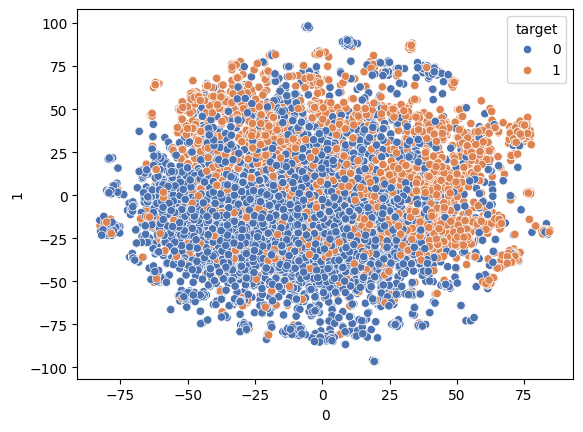

In [ ]:
tsne = TSNE(n_components=2, init="random", random_state=0, learning_rate='auto')
array_red = tsne.fit_transform(X_cross) 

df_tsne = pd.DataFrame(array_red)

df_tsne['target'] = y_cross

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], hue=df_tsne['target'], palette="deep")
plt.show()

In [ ]:
def getModel():
    return LogisticRegression(max_iter=200)
#     return DecisionTreeClassifier()
    # return RandomForestClassifier(n_jobs = 14)

In [ ]:
scores = cross_val_score(getModel(),X_cross,y_cross,cv=10)

np.mean(scores)

np.float64(0.828450098468309)

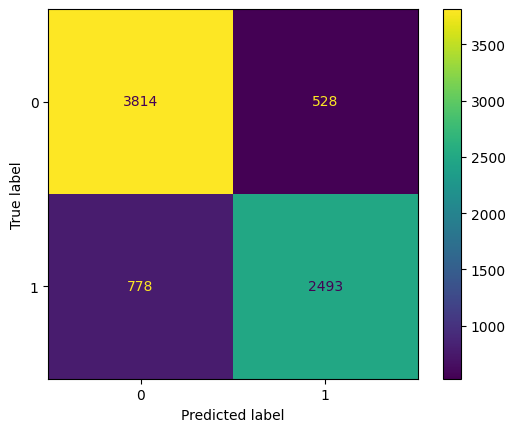

In [ ]:
predicoes = cross_val_predict(getModel(),X_cross,y_cross,cv=10)

cm = confusion_matrix(df_dados['target'], predicoes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
disp.plot()

plt.show()